<a href="https://colab.research.google.com/github/poluslavik13/innopolis/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Загрузка датасета с помощью функции np.genfromtxt()

In [1]:
import numpy as np

In [2]:
# загрузка данных
dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
t_iris = [('atr1','f8'), ('atr2','f8'), ('atr3','f8'), ('atr4','f8'), ('ctgr','U15')]
iris = np.genfromtxt(dataset, delimiter=',', dtype=t_iris)

In [3]:
# размер массива данных
iris.shape

(150,)

In [4]:
# проверка данных
iris[45:55]

array([(4.8, 3. , 1.4, 0.3, 'Iris-setosa'),
       (5.1, 3.8, 1.6, 0.2, 'Iris-setosa'),
       (4.6, 3.2, 1.4, 0.2, 'Iris-setosa'),
       (5.3, 3.7, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.3, 1.4, 0.2, 'Iris-setosa'),
       (7. , 3.2, 4.7, 1.4, 'Iris-versicolor'),
       (6.4, 3.2, 4.5, 1.5, 'Iris-versicolor'),
       (6.9, 3.1, 4.9, 1.5, 'Iris-versicolor'),
       (5.5, 2.3, 4. , 1.3, 'Iris-versicolor'),
       (6.5, 2.8, 4.6, 1.5, 'Iris-versicolor')],
      dtype=[('atr1', '<f8'), ('atr2', '<f8'), ('atr3', '<f8'), ('atr4', '<f8'), ('ctgr', '<U15')])

Вычисление простейшей статистики:
min,
max,
median,
mean,
0.25-percentile,
0.75-percentile
для каждого из числовых атрибутов в датасете

In [5]:
# формирование списка наименований числовых столбцов 
Atrs = []
for i in range(len(t_iris)-1):
    Atrs.append(t_iris[i][0])

# формирование стат.данных по числовым атрибутам
stat_gnrl = []
for atr in Atrs:
  stat_gnrl.append([
    iris[atr].min(),
    iris[atr].max(),
    np.median(iris[atr]),
    round(np.mean(iris[atr]),2),
    round(np.percentile(iris[atr],25),2),
    round(np.percentile(iris[atr],75),2)
  ])

stat_gnrl

[[4.3, 7.9, 5.8, 5.84, 5.1, 6.4],
 [2.0, 4.4, 3.0, 3.05, 2.8, 3.3],
 [1.0, 6.9, 4.35, 3.76, 1.6, 5.1],
 [0.1, 2.5, 1.3, 1.2, 0.3, 1.8]]

Постройте гистограмму для каждого из числовых атрибутов в датасете

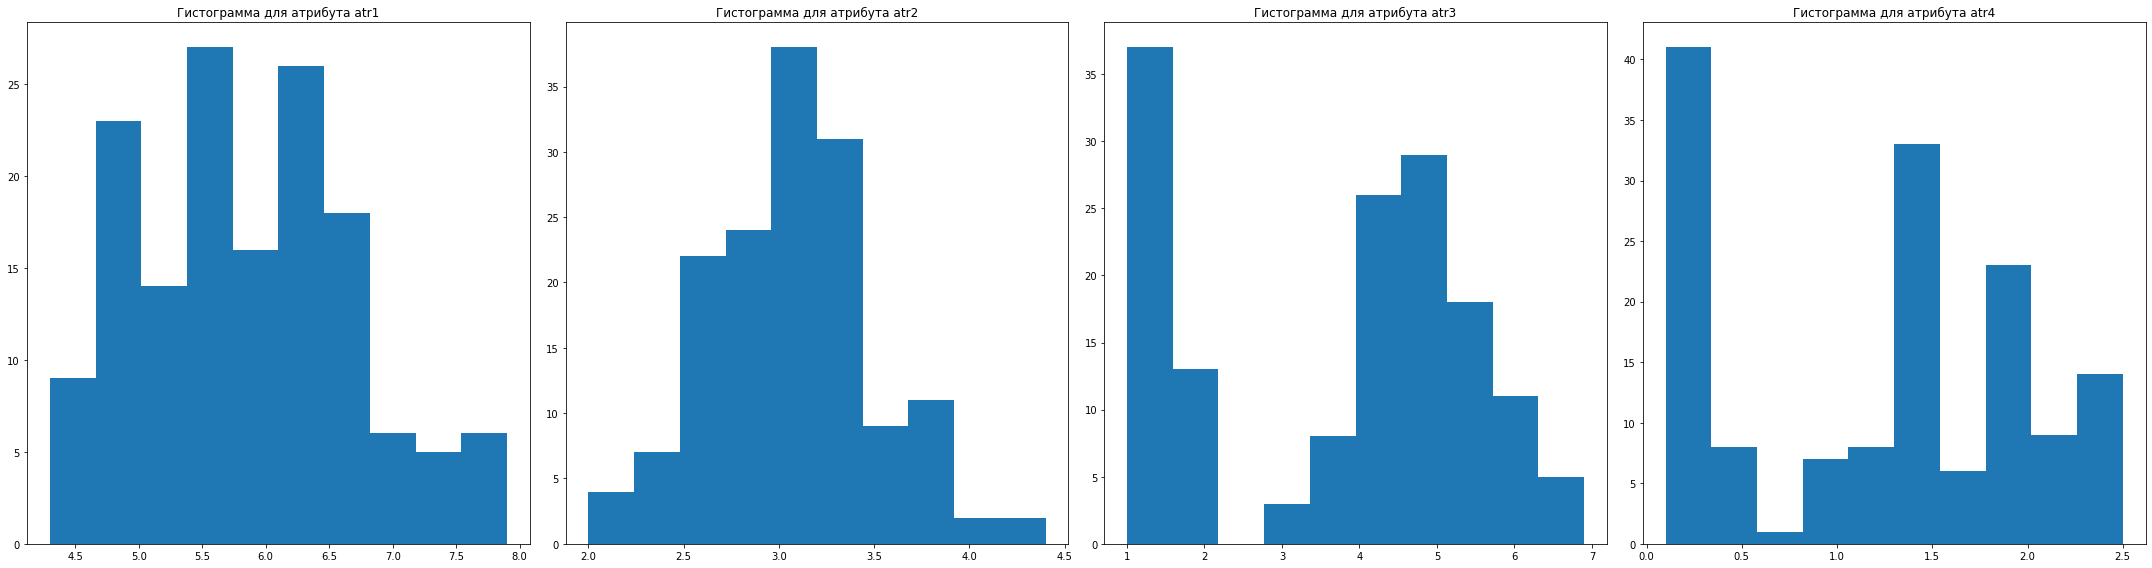

In [6]:
import matplotlib.pyplot as plt
import seaborn
import math

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(30)

subplt = 1
for atr in Atrs:
    ax = fig.add_subplot(1,len(Atrs),subplt).set(title = f'Гистограмма для атрибута {atr}')
    plt.hist(iris[atr])
    subplt +=1

plt.tight_layout()
plt.show()

Сгруппируйте датасет по категории (последний столбец датасета) и повторите шаги 2 и 3 для групп.

In [7]:
# выделение уникальных категорий
Uniq_ctgr = np.unique(iris['ctgr'])

# формирование стат.данных в разрезе категорий
stat_uniq = []
for ctg in Uniq_ctgr:
    tmp = []
    for atr in Atrs:
        tmp.append([
            atr,
            iris[atr][iris['ctgr'] == ctg].min(),
            iris[atr][iris['ctgr'] == ctg].max(),
            np.median(iris[atr][iris['ctgr'] == ctg]),
            round(np.mean(iris[atr][iris['ctgr'] == ctg]),2),
            round(np.percentile(iris[atr][iris['ctgr'] == ctg],25),2),
            round(np.percentile(iris[atr][iris['ctgr'] == ctg],75),2)
        ])
    stat_uniq.append([ctg,tmp])    
stat_uniq

[['Iris-setosa',
  [['atr1', 4.3, 5.8, 5.0, 5.01, 4.8, 5.2],
   ['atr2', 2.3, 4.4, 3.4, 3.42, 3.12, 3.68],
   ['atr3', 1.0, 1.9, 1.5, 1.46, 1.4, 1.58],
   ['atr4', 0.1, 0.6, 0.2, 0.24, 0.2, 0.3]]],
 ['Iris-versicolor',
  [['atr1', 4.9, 7.0, 5.9, 5.94, 5.6, 6.3],
   ['atr2', 2.0, 3.4, 2.8, 2.77, 2.52, 3.0],
   ['atr3', 3.0, 5.1, 4.35, 4.26, 4.0, 4.6],
   ['atr4', 1.0, 1.8, 1.3, 1.33, 1.2, 1.5]]],
 ['Iris-virginica',
  [['atr1', 4.9, 7.9, 6.5, 6.59, 6.22, 6.9],
   ['atr2', 2.2, 3.8, 3.0, 2.97, 2.8, 3.18],
   ['atr3', 4.5, 6.9, 5.55, 5.55, 5.1, 5.88],
   ['atr4', 1.4, 2.5, 2.0, 2.03, 1.8, 2.3]]]]

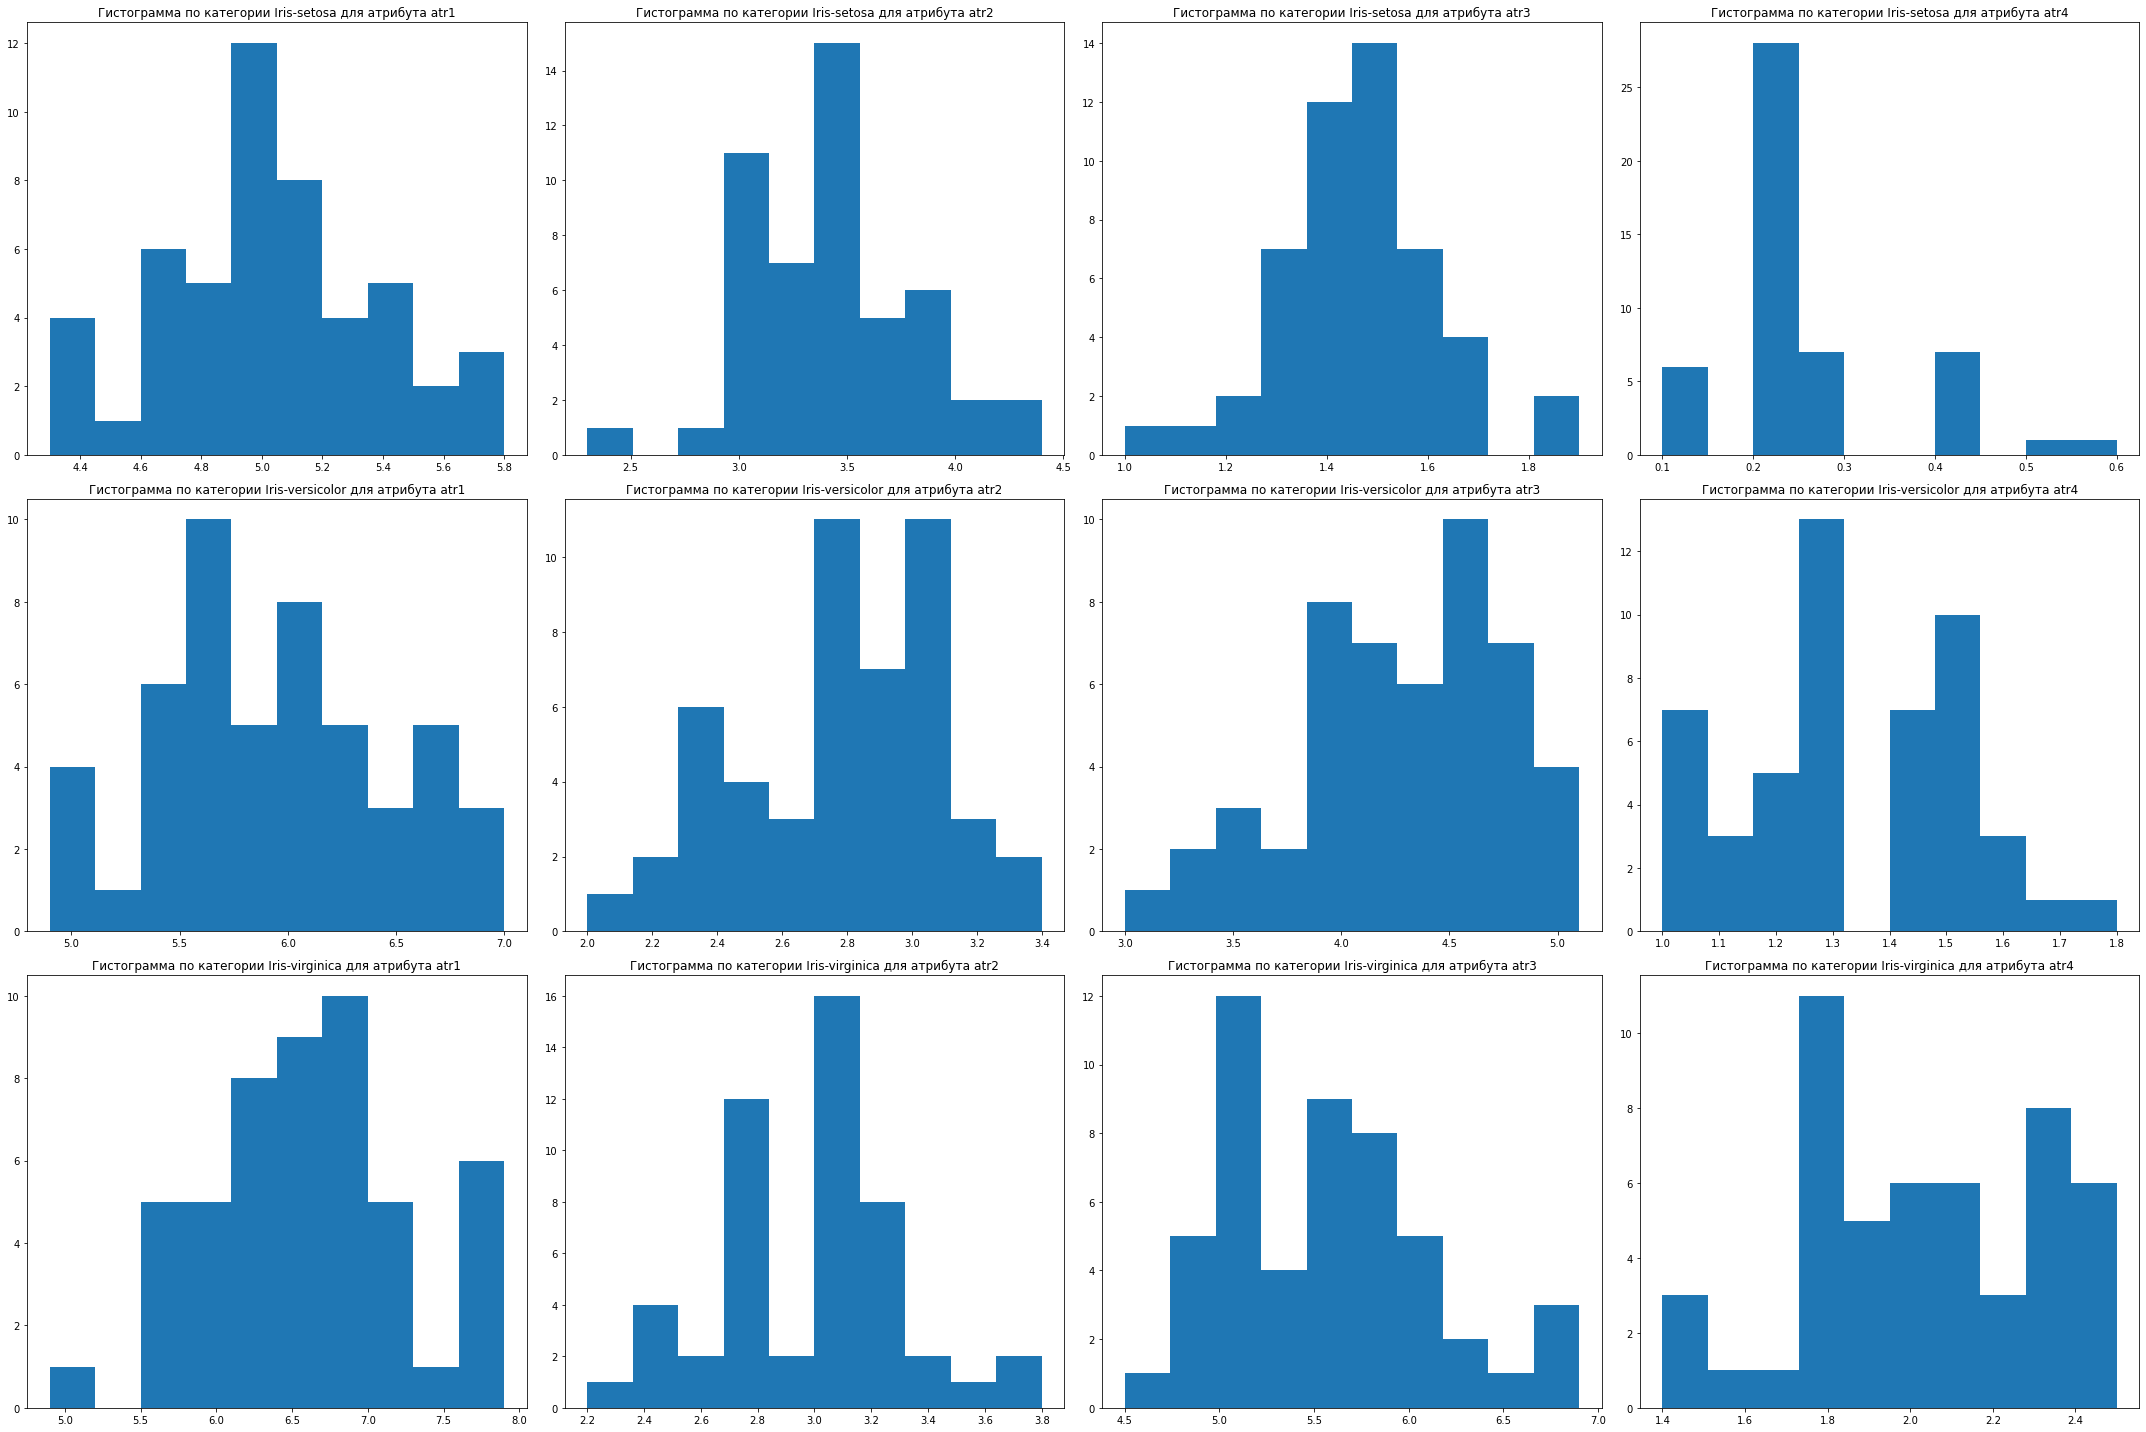

In [8]:
# построение гистограмм для атрибутов в разрезе категорий
import matplotlib.pyplot as plt
import seaborn
import math

fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(30)

subplt = 1
for ctg in Uniq_ctgr:
    for atr in Atrs:
        ax = fig.add_subplot(len(Uniq_ctgr),len(Atrs),subplt).set(title = f'Гистограмма по категории {ctg} для атрибута {atr}')
        plt.hist(iris[atr][iris['ctgr'] == ctg])
        subplt +=1

plt.tight_layout()
plt.show()